# Sentinel-5P TROPOMI UVAI

```{hint} 
<a href='https://dust.ltpy.adamplatform.eu/hub/user-redirect/lab/tree/01_observations/1_satellite/13_Sentinel-5P_TROPOMI_AI_L2_load_browse.ipynb' target='_blank'>Execute the notebook on the training platform >></a>
```

The following example introduces you to the Aerosol Index (AI) product from the Sentinel-5P TROPOMI instrument. The Aerosol Index (AI) is a qualitative index indicating the presence of elevated layers of aerosols with significant absorption. The main aerosol types that cause signals detected in the AI are `desert dust`, `biomass burning` and `volcanic ash plumes`. An advantage of the AI is that it can be derived for clear as well as (partly) cloudy ground pixels.


The Copernicus Sentinel-5 Precursor mission is the first Copernicus mission dedicated to atmospheric monitoring. The main objective of the Sentinel-5P mission is to perform atmospheric measurements with high spatio-temporal resolution, to be used for air quality, ozone & UV radiation, and climate monitoring and forecasting.

Sentinel-5P carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on:
* `Ozone`
* `NO`<sub>`2`</sub>
* `SO`<sub>`2`</sub>
* `Formaldehyde`
* `Aerosol`
* `Carbonmonoxide`
* `Methane`
* `Clouds`

Read more information about Sentinel-5P <a href='https://dataspace.copernicus.eu/explore-data/data-collections/sentinel-data/sentinel-5p' target='_blank'>here</a>.

```{admonition} Basic facts
**Spatial resolution**: `Up to 5.5* km x 3.5 km` (5.5 km in the satellite flight direction and 3.5 km in the perpendicular direction at nadir) <br>
**Spatial coverage**: `Global` <br>
**Revisit time**:  `less than one day` <br>
**Data availability**: `since April 2018`
```

```{admonition} How to access the data
Sentinel-5P data are disseminated in the `netCDF` format and can be downloaded as a zipped archive via the <a href='https://dataspace.copernicus.eu/' target='_blank'>Copernicus Data Space</a>:<br>
**Step 1**: <a href='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/login-actions/registration?client_id=account-console&tab_id=v_DHRD96Two' target='_blank'>Register</a> and create an account.<br>
**Step 2**: Go to the <a href='https://dataspace.copernicus.eu/explore-data/data-collections/sentinel-data/sentinel-5p) and view Level-2 Aerosol Index NTC data in the [Browser](https://eur02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fsentinelshare.page.link%2FDmLr&data=05%7C01%7C%7Cd36929ab445b4c210c4008db4fc55ec7%7C9e2777ed82374ab992782c144d6f6da3%7C0%7C1%7C638191481363675599%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=oDmtdAUHyNG0rViIcg7wQoxUlKqDj5ketUwh4r9u5a4%3D&reserved=0' target='_blank'>Sentinel-5P data collection</a>. <br>
**Step 3**: Go to `SEARCH` and search for `Sentinel-5P Level-2 AER-AI` data and select a date range (e.g 8 April 2024) and region of interest (e.g. bounding box covering the Mediterranean sea). <br>
**Step 4**: Select a file and download it.
```

<hr>

**Load required libraries**

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

**Load helper functions**

In [2]:
%run ../../functions.ipynb

<hr>

## Load and browse Sentinel-5P TROPOMI Aerosol Index Level 2 data

A Sentinel-5P TROPOMI Aerosol Index Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load a `netCDF` file with the `open_dataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 8 April 2024 at 12:20 UTC and inspect the data structure:

In [4]:
file = xr.open_dataset('../../eodata/1_satellite/sentinel5p/S5P_OFFL_L2__AER_AI_20240408T122051_20240408T140222_33612_03_020600_20240410T021230.nc', group='PRODUCT')
file

<xarray.Dataset> Size: 68MB
Dimensions:                          (scanline: 4173, ground_pixel: 450,
                                      time: 1, corner: 4)
Coordinates:
  * scanline                         (scanline) float64 33kB 0.0 ... 4.172e+03
  * ground_pixel                     (ground_pixel) float64 4kB 0.0 ... 449.0
  * time                             (time) datetime64[ns] 8B 2024-04-08
  * corner                           (corner) float64 32B 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 8MB ...
    longitude                        (time, scanline, ground_pixel) float32 8MB ...
Data variables:
    delta_time                       (time, scanline) datetime64[ns] 33kB ...
    time_utc                         (time, scanline) object 33kB ...
    qa_value                         (time, scanline, ground_pixel) float32 8MB ...
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 8MB ...
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 8MB ...
    aerosol_index_335_367            (time, scanline, ground_pixel) float32 8MB ...
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 8MB ...
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 8MB ...
    aerosol_index_335_367_precision  (time, scanline, ground_pixel) float32 8MB ...

You see that the loaded data object contains of four dimensions and seven data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `aerosol_index_354_388`: Aerosol index from 354 and 388 nm
  * `aerosol_index_340_380`: Aerosol index from 340 and 380 nm
  * `aerosol_index_354_388_precision`: Precision of aerosol index from 354 and 388 nm
  * `aerosol_index_340_380_precision`: Precision of aerosol index from 340 and 380 nm

**Retrieve the variable aerosol index from 354 and 388 nm as xarray.DataArray**

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `aerosol_index_354_388` is the 'Aerosol index from 354 and 388 nm' and has three dimensions, `time`, `scanline` and `ground_pixel` respectively.

In [5]:
ai = file['aerosol_index_354_388']
ai

<xarray.DataArray 'aerosol_index_354_388' (time: 1, scanline: 4173,
                                           ground_pixel: 450)> Size: 8MB
[1877850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 33kB 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 4kB 0.0 1.0 2.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 8B 2024-04-08
    latitude      (time, scanline, ground_pixel) float32 8MB ...
    longitude     (time, scanline, ground_pixel) float32 8MB ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 354 and 388 nm
    long_name:               Aerosol index from 354 and 388 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [6]:
ai_0804 = ai[0,:,:]
ai_0804

<xarray.DataArray 'aerosol_index_354_388' (scanline: 4173, ground_pixel: 450)> Size: 8MB
[1877850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 33kB 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 4kB 0.0 1.0 2.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 8B 2024-04-08
    latitude      (scanline, ground_pixel) float32 8MB ...
    longitude     (scanline, ground_pixel) float32 8MB ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 354 and 388 nm
    long_name:               Aerosol index from 354 and 388 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

Additionally, you can save the attributes `units` and `longname`, which you can make use of when visualizing the data.

In [7]:
longname = ai_0804.long_name
units = ai_0804.units

longname, units

('Aerosol index from 354 and 388 nm', '1')

## Visualize Sentinel-5P TROPOMI aerosol index from 388 and 354 nm

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

In [ ]:
?visualize_pcolormesh

You can make use of the variables we have defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the color scale and minimum and maxium data values.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol index from 354 and 388 nm 2024-04-08T00:00:00.000000000'}>)

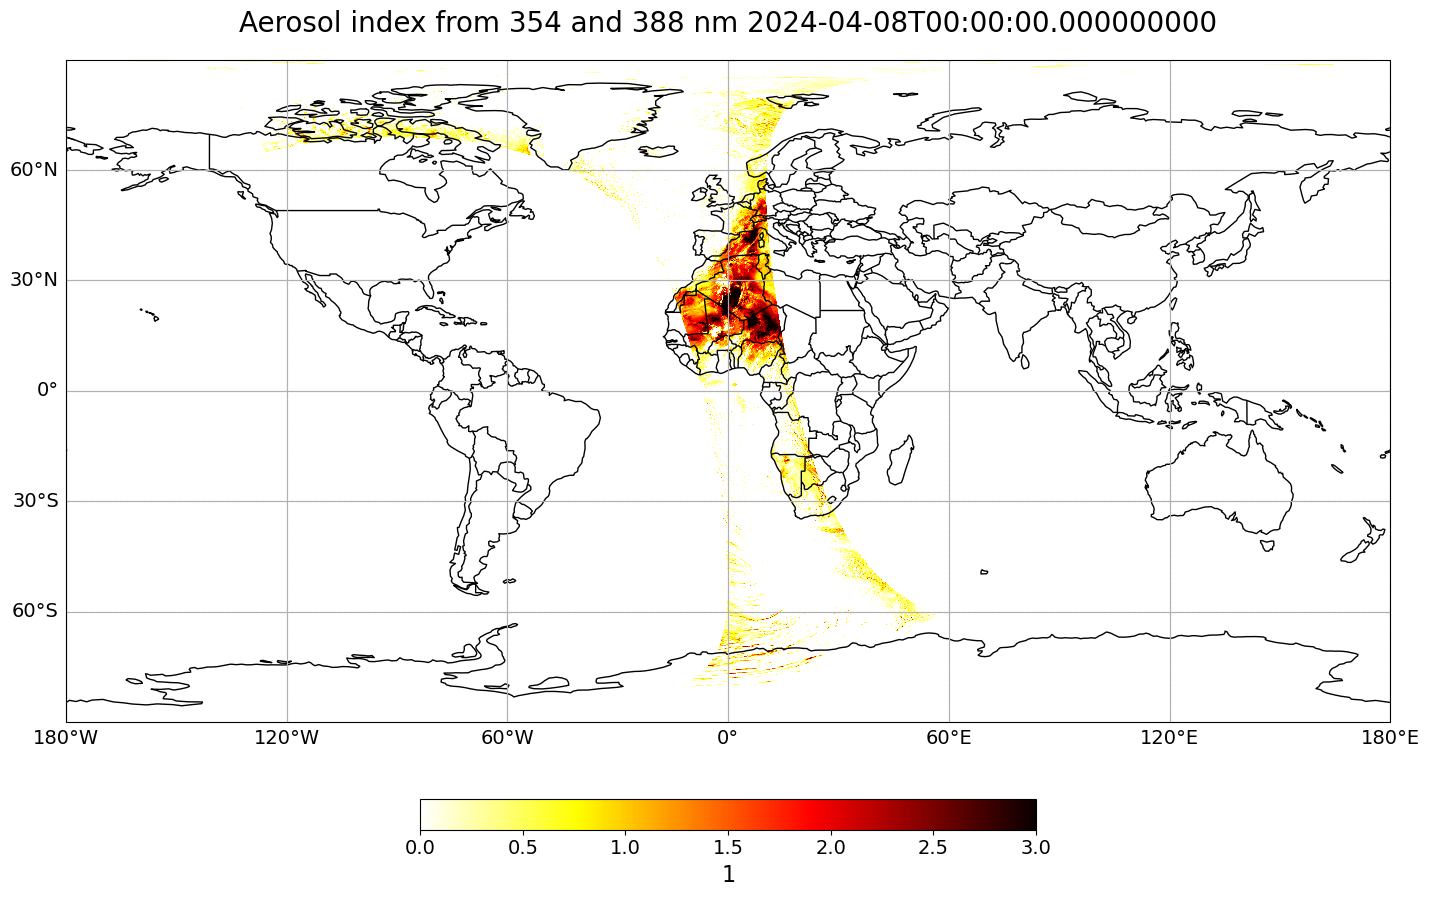

In [9]:
visualize_pcolormesh(data_array=ai_0804,
                     longitude=ai_0804.longitude,
                     latitude=ai_0804.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0804.time.data),
                     vmin=0, 
                     vmax=3)

## Create a geographical subset for Europe

The map above shows the aerosol index of one footprint along the entire latitude range. Let us create a geographical subset for Europe, in order to better analyse the Saharan dust event which occured in April 2024 over Europe.

For geographical subsetting, you can use the function [generate_geographical_subset](../../functions.ipynb#generate_geographical_subset). You can use `?generate_geographical_subset` to open the docstring in order to see the function's keyword arguments.

In [ ]:
?generate_geographical_subset

Define the bounding box information for Europe

In [10]:
latmin = 28.
latmax = 71.
lonmin = -22.
lonmax = 43

Now, let us apply the function [generate_geographical_subset](../../functions.ipynb#generate_geographcial_subset) to subset the `ai_0804` xarray.DataArray. Let us call the new `xarray.DataArray` `ai_0804_subset`.

In [11]:
ai_0804_subset = generate_geographical_subset(xarray=ai_0804, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
ai_0804_subset

<xarray.DataArray 'aerosol_index_354_388' (scanline: 908, ground_pixel: 450)> Size: 2MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.74332285, 0.8022466 ,
        0.7808357 ],
       [       nan,        nan,        nan, ..., 0.73813915, 0.8050948 ,
        0.8071973 ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 7kB 2.405e+03 2.406e+03 ... 3.312e+03
  * ground_pixel  (ground_pixel) float64 4kB 0.0 1.0 2.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 8B 2024-04-08
    latitude      (scanline, ground_pixel) float32 2MB 22.48 22.52 ... 71.48
    longitude     (scanline, ground_pixel) float32 2MB -13.48 -13.4 ... 12.63
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 354 and 388 nm
    long_name:               Aerosol index from 354 and 388 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

Let us visualize the subsetted `xarray.DataArray` again. This time, you set the `set_global` kwarg to `False` and you specify the longitude and latitude bounds specified above.

Additionally, in order to have the time information as part of the title, we add the string of the datetime information to the `longname` variable: `longname + ' ' + str(ai_0804.time.data)`.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol index from 354 and 388 nm 2024-04-08T00:00:00.000000000'}>)

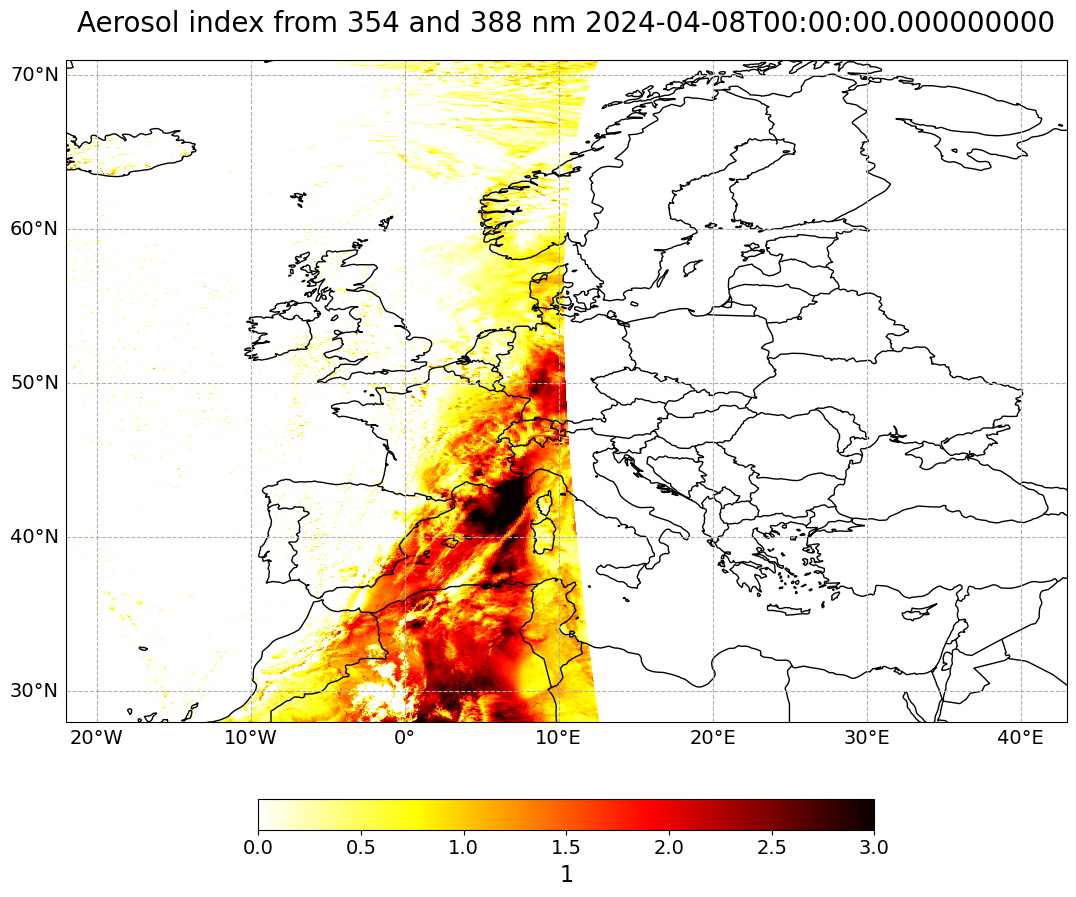

In [12]:
visualize_pcolormesh(data_array=ai_0804_subset,
                     longitude=ai_0804_subset.longitude,
                     latitude=ai_0804_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0804_subset.time.data),
                     vmin=0, 
                     vmax=3,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)